In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("freelancer_data_after_cleen.csv")  # Replace with actual file name

# Show first 5 rows
print(df.head())

# Show column names
print("Columns:", df.columns)


                        name  price     country  \
0  OweBest Technologies Pvt.     18       India   
1     Elite Information Tech     15       India   
2        TAFSOL Technologies     45    Pakistan   
3               eTranslators     30  Bangladesh   
4  ✈THE MARKETING MAVERICKS™     45       India   

                                         description rating reviews Region  \
0  OweBest is a dynamic and rapidly expanding IT ...    4.9     490   Asia   
1  7000 ⭐⭐⭐⭐⭐+ Reviews, 2000+ satisfied clients G...    4.9    7018   Asia   
2  TAFSOL TECHNOLOGIES Group!! Aiming to deliver ...    5.0     195   Asia   
3  eTranslators offers over a DECADE of experienc...    4.9    3633   Asia   
4  The Grace Of Almighty God ____________________...    5.0     558   Asia   

                                         skills_list  skills_count    level  \
0  ['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...             3  level-5   
1  ['SEOLink', 'BuildingInternet', 'MarketingAdve...             4

In [2]:
print(df.dtypes)


name                                        object
price                                        int64
country                                     object
description                                 object
rating                                      object
reviews                                     object
Region                                      object
skills_list                                 object
skills_count                                 int64
level                                       object
categories                                  object
skills_list_standardization                 object
description_Length                           int64
Extracted_Skills_from_description           object
Extracted_Skills_from_description_list      object
Extracted_Skills_from_description_number     int64
dtype: object


In [3]:
df = df.drop(columns=["description"])
df


,name,price,country,rating,reviews,Region,skills_list,skills_count,level,categories,skills_list_standardization,description_Length,Extracted_Skills_from_description,Extracted_Skills_from_description_list,Extracted_Skills_from_description_number
0,OweBest Technologies Pvt.,18,India,4.9,490,Asia,"['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...",3,level-5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'My', 'Software', 'Archi...",994,"business, expertise, Web, Design, Development,...","[' Web', ' Development', ' quality', ' experti...",221
1,Elite Information Tech,15,India,4.9,7018,Asia,"['SEOLink', 'BuildingInternet', 'MarketingAdve...",4,level-5,['Marketing'],"['Link', 'Building', 'Internet', 'Marketing', ...",2936,"clients, Business, Expertise, Google, Marketin...","[' Data', ' Experience', ' Years', ' social', ...",420
2,TAFSOL Technologies,45,Pakistan,5.0,195,Asia,"['PHPWebsite', 'DesignHTMLSoftware', 'Architec...",4,level-5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'Software', 'Architectur...",2663,"Projects, Digital, SERVICES, Mobile, App, Deve...","[' Experience', ' experience', ' Years', ' web...",464
3,eTranslators,30,Bangladesh,4.9,3633,Asia,"['TranslationEnglish (US)', 'TranslatorEnglish...",4,level-5,['Translation'],"['Translation', 'English', 'Translator', 'Engl...",1296,"experience, professional, DIGITAL, CONTENT, DE...","[' quality', ' MANAGEMENT', ' services', ' Hig...",158
4,✈THE MARKETING MAVERICKS™,45,India,5.0,558,Asia,"['Internet', 'MarketingFacebook', 'MarketingSo...",5,level-3,['Other'],"['Internet', 'Marketing', 'Facebook', 'Marketi...",1508,"Marketing, Google, services, Services, Google,...","[' Web', ' business', ' services', ' Business'...",186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,Imara Software Solutions,35,Sri Lanka,4.9,1703,Asia,"['PHPMySQLSoftware', 'ArchitectureJavaScriptAm...",4,level-3,"['Programming', 'Web Development']","['My', 'Software', 'Architecture', 'Java', 'Sc...",925,"professional, work, experience, Web, App, year...","[' Web', ' let', 'professional', ' using', ' w...",90
8397,Emdyarts,25,India,4.9,2755,Asia,"['Graphic', 'DesignPhotoshopLogo', 'DesignPhot...",5,level-5,['Graphic Design'],"['Graphic', 'Design', 'Photoshop', 'Logo', 'De...",1087,"Graphic, services, Logo, designs, clients, Log...","[' Logo', ' clients', 'Graphic', ' services', ...",97
8398,Bhawan Deep S.,25,India,4.9,475,Asia,"['PHPHTMLWebsite', 'DesignWordPressGraphic', '...",3,level-5,"['Graphic Design', 'Web Development']","['Website', 'Design', 'Word', 'Press', 'Graphi...",739,"developer, years, experience, skills, software...","['developer', ' app', ' skills', ' work', ' so...",121
8399,Dipti S.,15,India,5.0,388,Asia,"['PHPMagentoHTMLeCommerceWebsite', 'Design']",2,level-4,"['Graphic Design', 'Web Development']","['Magento', 'Le', 'Commerce', 'Website', 'Desi...",945,"Web, Developer, years, experience, Skills, Exp...","[' development', ' quality', ' Custom', ' Skil...",100


# Separate Numeric & Categorical Data

In [4]:
import pandas as pd

# Ensure 'level' is a string first (to prevent errors)
df["level"] = df["level"].astype(str)

# Extract the numeric part (digits only)
df["level"] = df["level"].str.extract("(\d+)")

# Replace NaN values with 0
df["level"] = df["level"].fillna(0)

# Convert 'level' to integer
df["level"] = df["level"].astype(int)


In [5]:
# Convert 'rating' and 'reviews' to numeric, replacing NaNs with 0
df["rating"] = pd.to_numeric(df["rating"], errors="coerce").fillna(0).round()
df["reviews"] = pd.to_numeric(df["reviews"], errors="coerce").fillna(0).round()


In [6]:
df_numeric = df.select_dtypes(include=["number"])

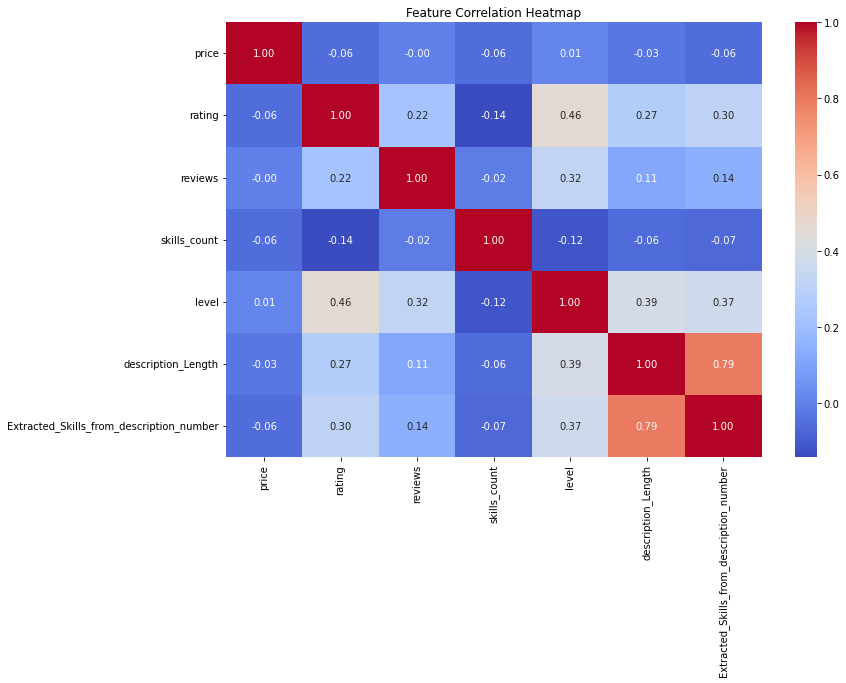

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
df = df.drop(columns=["description_Length"])
df

,name,price,country,rating,reviews,Region,skills_list,skills_count,level,categories,skills_list_standardization,Extracted_Skills_from_description,Extracted_Skills_from_description_list,Extracted_Skills_from_description_number
0,OweBest Technologies Pvt.,18,India,5.0,490.0,Asia,"['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...",3,5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'My', 'Software', 'Archi...","business, expertise, Web, Design, Development,...","[' Web', ' Development', ' quality', ' experti...",221
1,Elite Information Tech,15,India,5.0,7018.0,Asia,"['SEOLink', 'BuildingInternet', 'MarketingAdve...",4,5,['Marketing'],"['Link', 'Building', 'Internet', 'Marketing', ...","clients, Business, Expertise, Google, Marketin...","[' Data', ' Experience', ' Years', ' social', ...",420
2,TAFSOL Technologies,45,Pakistan,5.0,195.0,Asia,"['PHPWebsite', 'DesignHTMLSoftware', 'Architec...",4,5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'Software', 'Architectur...","Projects, Digital, SERVICES, Mobile, App, Deve...","[' Experience', ' experience', ' Years', ' web...",464
3,eTranslators,30,Bangladesh,5.0,3633.0,Asia,"['TranslationEnglish (US)', 'TranslatorEnglish...",4,5,['Translation'],"['Translation', 'English', 'Translator', 'Engl...","experience, professional, DIGITAL, CONTENT, DE...","[' quality', ' MANAGEMENT', ' services', ' Hig...",158
4,✈THE MARKETING MAVERICKS™,45,India,5.0,558.0,Asia,"['Internet', 'MarketingFacebook', 'MarketingSo...",5,3,['Other'],"['Internet', 'Marketing', 'Facebook', 'Marketi...","Marketing, Google, services, Services, Google,...","[' Web', ' business', ' services', ' Business'...",186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,Imara Software Solutions,35,Sri Lanka,5.0,1703.0,Asia,"['PHPMySQLSoftware', 'ArchitectureJavaScriptAm...",4,3,"['Programming', 'Web Development']","['My', 'Software', 'Architecture', 'Java', 'Sc...","professional, work, experience, Web, App, year...","[' Web', ' let', 'professional', ' using', ' w...",90
8397,Emdyarts,25,India,5.0,2755.0,Asia,"['Graphic', 'DesignPhotoshopLogo', 'DesignPhot...",5,5,['Graphic Design'],"['Graphic', 'Design', 'Photoshop', 'Logo', 'De...","Graphic, services, Logo, designs, clients, Log...","[' Logo', ' clients', 'Graphic', ' services', ...",97
8398,Bhawan Deep S.,25,India,5.0,475.0,Asia,"['PHPHTMLWebsite', 'DesignWordPressGraphic', '...",3,5,"['Graphic Design', 'Web Development']","['Website', 'Design', 'Word', 'Press', 'Graphi...","developer, years, experience, skills, software...","['developer', ' app', ' skills', ' work', ' so...",121
8399,Dipti S.,15,India,5.0,388.0,Asia,"['PHPMagentoHTMLeCommerceWebsite', 'Design']",2,4,"['Graphic Design', 'Web Development']","['Magento', 'Le', 'Commerce', 'Website', 'Desi...","Web, Developer, years, experience, Skills, Exp...","[' development', ' quality', ' Custom', ' Skil...",100


In [9]:
df = df.drop(columns=["skills_count"])


In [10]:
df = df.drop(columns=["Extracted_Skills_from_description_number"])

In [11]:
df = df.drop(columns=["Extracted_Skills_from_description"])
df

,name,price,country,rating,reviews,Region,skills_list,level,categories,skills_list_standardization,Extracted_Skills_from_description_list
0,OweBest Technologies Pvt.,18,India,5.0,490.0,Asia,"['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...",5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'My', 'Software', 'Archi...","[' Web', ' Development', ' quality', ' experti..."
1,Elite Information Tech,15,India,5.0,7018.0,Asia,"['SEOLink', 'BuildingInternet', 'MarketingAdve...",5,['Marketing'],"['Link', 'Building', 'Internet', 'Marketing', ...","[' Data', ' Experience', ' Years', ' social', ..."
2,TAFSOL Technologies,45,Pakistan,5.0,195.0,Asia,"['PHPWebsite', 'DesignHTMLSoftware', 'Architec...",5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'Software', 'Architectur...","[' Experience', ' experience', ' Years', ' web..."
3,eTranslators,30,Bangladesh,5.0,3633.0,Asia,"['TranslationEnglish (US)', 'TranslatorEnglish...",5,['Translation'],"['Translation', 'English', 'Translator', 'Engl...","[' quality', ' MANAGEMENT', ' services', ' Hig..."
4,✈THE MARKETING MAVERICKS™,45,India,5.0,558.0,Asia,"['Internet', 'MarketingFacebook', 'MarketingSo...",3,['Other'],"['Internet', 'Marketing', 'Facebook', 'Marketi...","[' Web', ' business', ' services', ' Business'..."
...,...,...,...,...,...,...,...,...,...,...,...
8396,Imara Software Solutions,35,Sri Lanka,5.0,1703.0,Asia,"['PHPMySQLSoftware', 'ArchitectureJavaScriptAm...",3,"['Programming', 'Web Development']","['My', 'Software', 'Architecture', 'Java', 'Sc...","[' Web', ' let', 'professional', ' using', ' w..."
8397,Emdyarts,25,India,5.0,2755.0,Asia,"['Graphic', 'DesignPhotoshopLogo', 'DesignPhot...",5,['Graphic Design'],"['Graphic', 'Design', 'Photoshop', 'Logo', 'De...","[' Logo', ' clients', 'Graphic', ' services', ..."
8398,Bhawan Deep S.,25,India,5.0,475.0,Asia,"['PHPHTMLWebsite', 'DesignWordPressGraphic', '...",5,"['Graphic Design', 'Web Development']","['Website', 'Design', 'Word', 'Press', 'Graphi...","['developer', ' app', ' skills', ' work', ' so..."
8399,Dipti S.,15,India,5.0,388.0,Asia,"['PHPMagentoHTMLeCommerceWebsite', 'Design']",4,"['Graphic Design', 'Web Development']","['Magento', 'Le', 'Commerce', 'Website', 'Desi...","[' development', ' quality', ' Custom', ' Skil..."


In [12]:
df = df.drop(columns=["name"])
df

,price,country,rating,reviews,Region,skills_list,level,categories,skills_list_standardization,Extracted_Skills_from_description_list
0,18,India,5.0,490.0,Asia,"['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...",5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'My', 'Software', 'Archi...","[' Web', ' Development', ' quality', ' experti..."
1,15,India,5.0,7018.0,Asia,"['SEOLink', 'BuildingInternet', 'MarketingAdve...",5,['Marketing'],"['Link', 'Building', 'Internet', 'Marketing', ...","[' Data', ' Experience', ' Years', ' social', ..."
2,45,Pakistan,5.0,195.0,Asia,"['PHPWebsite', 'DesignHTMLSoftware', 'Architec...",5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'Software', 'Architectur...","[' Experience', ' experience', ' Years', ' web..."
3,30,Bangladesh,5.0,3633.0,Asia,"['TranslationEnglish (US)', 'TranslatorEnglish...",5,['Translation'],"['Translation', 'English', 'Translator', 'Engl...","[' quality', ' MANAGEMENT', ' services', ' Hig..."
4,45,India,5.0,558.0,Asia,"['Internet', 'MarketingFacebook', 'MarketingSo...",3,['Other'],"['Internet', 'Marketing', 'Facebook', 'Marketi...","[' Web', ' business', ' services', ' Business'..."
...,...,...,...,...,...,...,...,...,...,...
8396,35,Sri Lanka,5.0,1703.0,Asia,"['PHPMySQLSoftware', 'ArchitectureJavaScriptAm...",3,"['Programming', 'Web Development']","['My', 'Software', 'Architecture', 'Java', 'Sc...","[' Web', ' let', 'professional', ' using', ' w..."
8397,25,India,5.0,2755.0,Asia,"['Graphic', 'DesignPhotoshopLogo', 'DesignPhot...",5,['Graphic Design'],"['Graphic', 'Design', 'Photoshop', 'Logo', 'De...","[' Logo', ' clients', 'Graphic', ' services', ..."
8398,25,India,5.0,475.0,Asia,"['PHPHTMLWebsite', 'DesignWordPressGraphic', '...",5,"['Graphic Design', 'Web Development']","['Website', 'Design', 'Word', 'Press', 'Graphi...","['developer', ' app', ' skills', ' work', ' so..."
8399,15,India,5.0,388.0,Asia,"['PHPMagentoHTMLeCommerceWebsite', 'Design']",4,"['Graphic Design', 'Web Development']","['Magento', 'Le', 'Commerce', 'Website', 'Desi...","[' development', ' quality', ' Custom', ' Skil..."


In [13]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Selecting categorical features
categorical_features = ["country","Region", "skills_list", "categories","skills_list_standardization","Extracted_Skills_from_description_list"]

# Encode categorical variables since Chi-Square needs numeric inputs
label_encoders = {}
encoded_data = df[categorical_features].copy()

for col in categorical_features:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders if needed later

# Perform Chi-Square test
chi_scores, p_values = chi2(encoded_data, df["price"])

# Create a DataFrame with results
chi_results = pd.DataFrame({
    "Feature": categorical_features,
    "Chi-Square Score": chi_scores,
    "p-value": p_values
})

# Keep only significant features (p-value < 0.05)
selected_categorical_features = chi_results[chi_results["p-value"] < 0.07]["Feature"].tolist()

print("Selected Categorical Features:", selected_categorical_features)


Selected Categorical Features: ['country', 'Region', 'skills_list', 'categories', 'skills_list_standardization', 'Extracted_Skills_from_description_list']


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Selecting numerical features (excluding target variable)
numerical_features = df.select_dtypes(include=["number"]).columns.tolist()
numerical_features.remove("price")

# Standardize numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_features])

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, df["price"])

# Get feature importance scores
feature_importance = pd.DataFrame({
    "Feature": numerical_features,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Select features with importance > threshold (e.g., 0.01)
selected_numerical_features = feature_importance[feature_importance["Importance"] > 0.01]["Feature"].tolist()

print("Selected Numerical Features:", selected_numerical_features)


Selected Numerical Features: ['reviews', 'level', 'rating']


In [15]:
final_selected_features = selected_categorical_features + selected_numerical_features + ["price"]
df_selected = df[final_selected_features]

print("Final Selected Features:", df_selected.columns.tolist())


Final Selected Features: ['country', 'Region', 'skills_list', 'categories', 'skills_list_standardization', 'Extracted_Skills_from_description_list', 'reviews', 'level', 'rating', 'price']


In [16]:
print(df.dtypes)


price                                       int64
country                                    object
rating                                    float64
reviews                                   float64
Region                                     object
skills_list                                object
level                                       int32
categories                                 object
skills_list_standardization                object
Extracted_Skills_from_description_list     object
dtype: object


In [17]:
# Convert 'reviews' column to int
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce').fillna(0).astype(int)

# Verify the change
print(df.dtypes)

price                                       int64
country                                    object
rating                                    float64
reviews                                     int32
Region                                     object
skills_list                                object
level                                       int32
categories                                 object
skills_list_standardization                object
Extracted_Skills_from_description_list     object
dtype: object


In [18]:
df_selected

,country,Region,skills_list,categories,skills_list_standardization,Extracted_Skills_from_description_list,reviews,level,rating,price
0,India,Asia,"['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...","['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'My', 'Software', 'Archi...","[' Web', ' Development', ' quality', ' experti...",490.0,5,5.0,18
1,India,Asia,"['SEOLink', 'BuildingInternet', 'MarketingAdve...",['Marketing'],"['Link', 'Building', 'Internet', 'Marketing', ...","[' Data', ' Experience', ' Years', ' social', ...",7018.0,5,5.0,15
2,Pakistan,Asia,"['PHPWebsite', 'DesignHTMLSoftware', 'Architec...","['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'Software', 'Architectur...","[' Experience', ' experience', ' Years', ' web...",195.0,5,5.0,45
3,Bangladesh,Asia,"['TranslationEnglish (US)', 'TranslatorEnglish...",['Translation'],"['Translation', 'English', 'Translator', 'Engl...","[' quality', ' MANAGEMENT', ' services', ' Hig...",3633.0,5,5.0,30
4,India,Asia,"['Internet', 'MarketingFacebook', 'MarketingSo...",['Other'],"['Internet', 'Marketing', 'Facebook', 'Marketi...","[' Web', ' business', ' services', ' Business'...",558.0,3,5.0,45
...,...,...,...,...,...,...,...,...,...,...
8396,Sri Lanka,Asia,"['PHPMySQLSoftware', 'ArchitectureJavaScriptAm...","['Programming', 'Web Development']","['My', 'Software', 'Architecture', 'Java', 'Sc...","[' Web', ' let', 'professional', ' using', ' w...",1703.0,3,5.0,35
8397,India,Asia,"['Graphic', 'DesignPhotoshopLogo', 'DesignPhot...",['Graphic Design'],"['Graphic', 'Design', 'Photoshop', 'Logo', 'De...","[' Logo', ' clients', 'Graphic', ' services', ...",2755.0,5,5.0,25
8398,India,Asia,"['PHPHTMLWebsite', 'DesignWordPressGraphic', '...","['Graphic Design', 'Web Development']","['Website', 'Design', 'Word', 'Press', 'Graphi...","['developer', ' app', ' skills', ' work', ' so...",475.0,5,5.0,25
8399,India,Asia,"['PHPMagentoHTMLeCommerceWebsite', 'Design']","['Graphic Design', 'Web Development']","['Magento', 'Le', 'Commerce', 'Website', 'Desi...","[' development', ' quality', ' Custom', ' Skil...",388.0,4,5.0,15


In [19]:
# Save the cleaned data to a new CSV file
df.to_csv("selected_data.csv", index=False)

print("Data saved successfully to freelancer_cleaned.csv")


Data saved successfully to freelancer_cleaned.csv


In [20]:
# Extracted_Skills_from_description_number , skills_list_standardization , skills count

# Insights and Visualization

#  Distribution of Service Prices

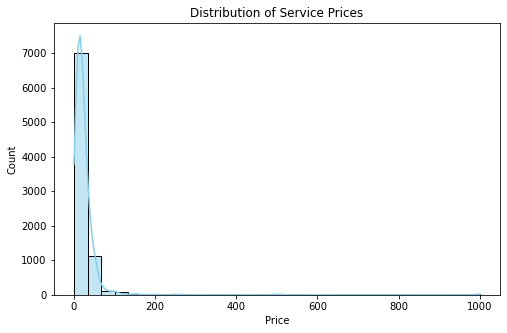

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Service Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

#  Experience Level Distribution


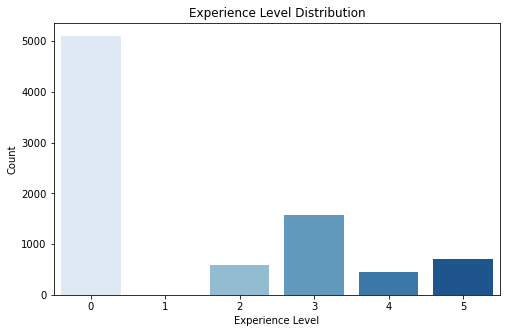

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["level"], palette="Blues")
plt.title("Experience Level Distribution")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()

# Rating Distribution

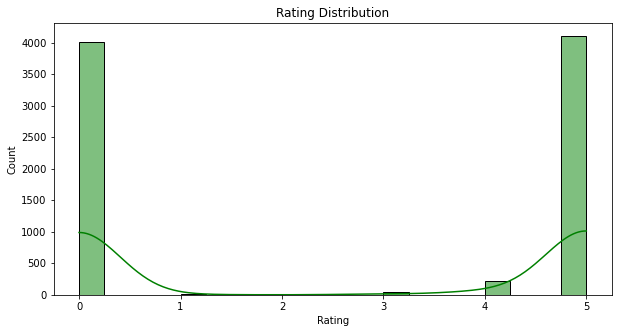

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df["rating"], bins=20, kde=True, color="green")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#  Top 10 Countries by Number of Freelancers


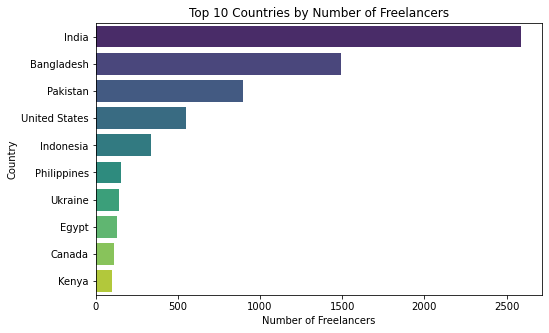

In [24]:
plt.figure(figsize=(8, 5))
top_countries = df["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Number of Freelancers")
plt.xlabel("Number of Freelancers")
plt.ylabel("Country")
plt.show()

# Average Rating by Region


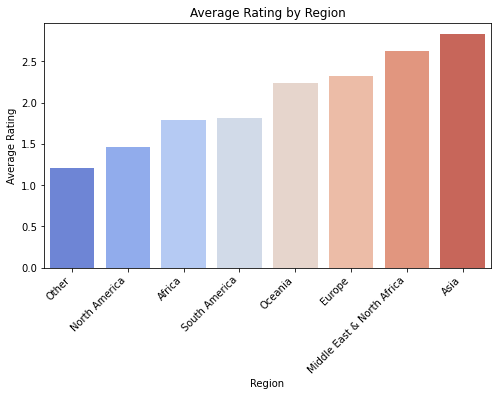

In [25]:
plt.figure(figsize=(8, 5))
region_ratings = df.groupby("Region")["rating"].mean().sort_values()
sns.barplot(x=region_ratings.index, y=region_ratings.values, palette="coolwarm")
plt.title("Average Rating by Region")
plt.xlabel("Region")
plt.ylabel("Average Rating")
# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees, align right

# Add some spacing to the bottom of the plot to prevent labels from being cut off
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()

#  Most In-Demand Skills (Top 10 from skills_list_standardization)



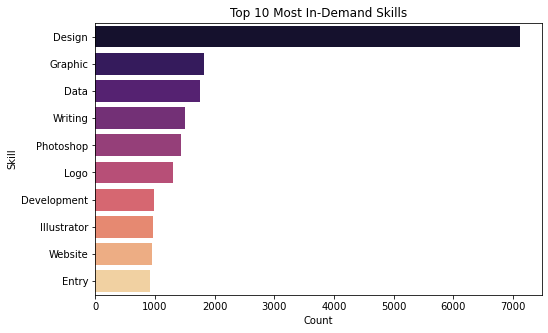

In [26]:
import ast
from collections import Counter

plt.figure(figsize=(8, 5))
all_skills = sum(df["skills_list_standardization"].apply(ast.literal_eval), [])
skill_counts = Counter(all_skills).most_common(10)
skill_df = pd.DataFrame(skill_counts, columns=["Skill", "Count"])
sns.barplot(y=skill_df["Skill"], x=skill_df["Count"], palette="magma")
plt.title("Top 10 Most In-Demand Skills")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()

#  Most In-Demand Skills (Extracted_Skills_from_description_list)

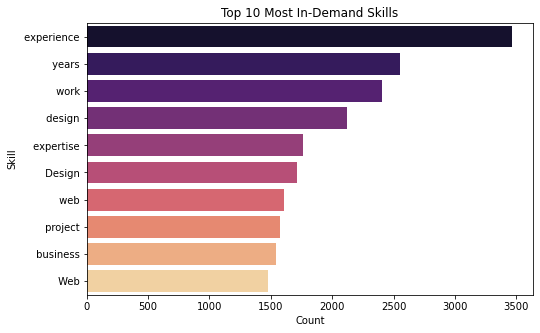

In [27]:
plt.figure(figsize=(8, 5))
all_skills = sum(df["Extracted_Skills_from_description_list"].apply(ast.literal_eval), [])
skill_counts = Counter(all_skills).most_common(10)
skill_df = pd.DataFrame(skill_counts, columns=["Skill", "Count"])
sns.barplot(y=skill_df["Skill"], x=skill_df["Count"], palette="magma")
plt.title("Top 10 Most In-Demand Skills")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()

#  Top Categories by Frequency


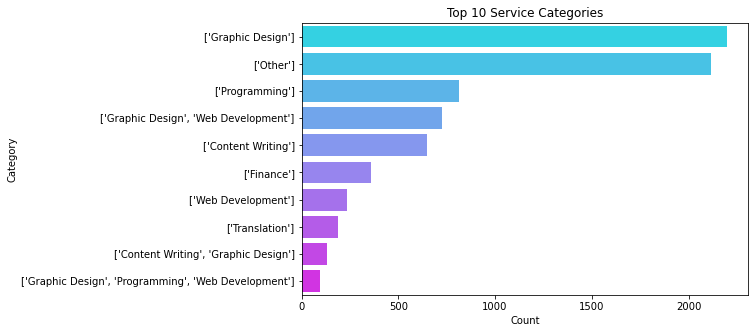

In [28]:
plt.figure(figsize=(8, 5))
top_categories = df["categories"].value_counts().head(10)
sns.barplot(y=top_categories.index, x=top_categories.values, palette="cool")
plt.title("Top 10 Service Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

#  Price vs. Rating Scatter Plot

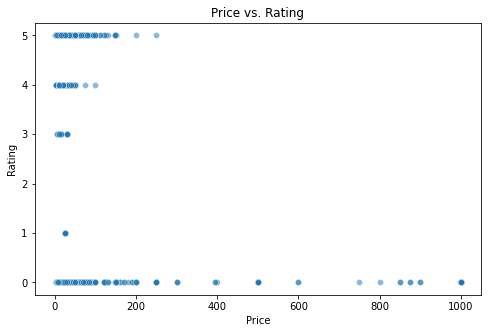

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["price"], y=df["rating"], alpha=0.5)
plt.title("Price vs. Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

#  Number of Reviews vs. Rating


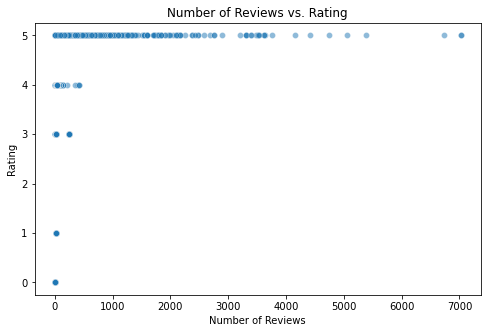

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["reviews"], y=df["rating"], alpha=0.5)
plt.title("Number of Reviews vs. Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

# Price Distribution by Region

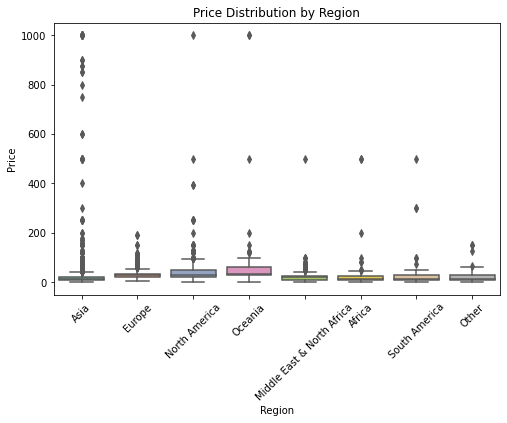

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Region"], y=df["price"], palette="Set2")
plt.title("Price Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

# Which country has the highest average price for services?

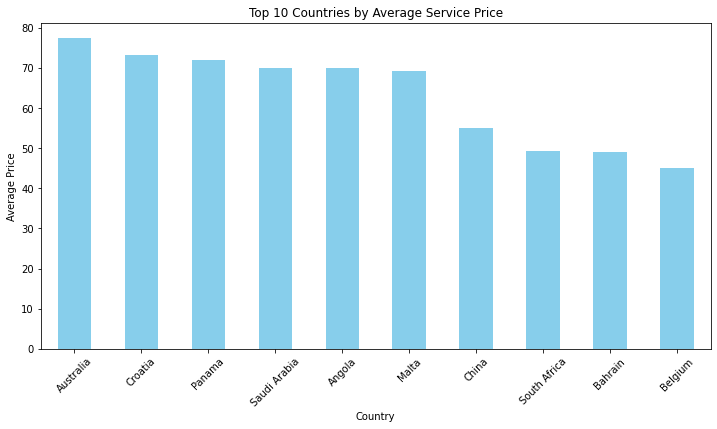

In [32]:
plt.figure(figsize=(12, 6))
price_by_country = df.groupby("country")["price"].mean().sort_values(ascending=False)
price_by_country[:10].plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries by Average Service Price")
plt.xlabel("Country")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

#  Price vs. Number of Categories


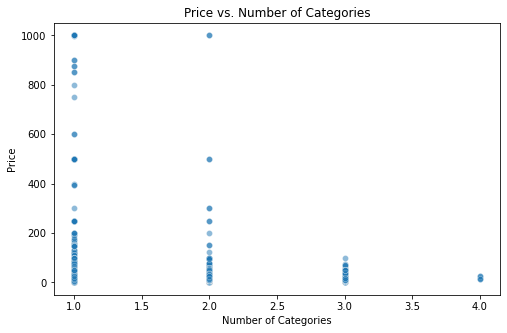

In [33]:
plt.figure(figsize=(8, 5))
df["num_categories"] = df["categories"].apply(lambda x: len(str(x).split(',')))
sns.scatterplot(x=df["num_categories"], y=df["price"], alpha=0.5)
plt.title("Price vs. Number of Categories")
plt.xlabel("Number of Categories")
plt.ylabel("Price")
plt.show()

# Average Price by Experience Level

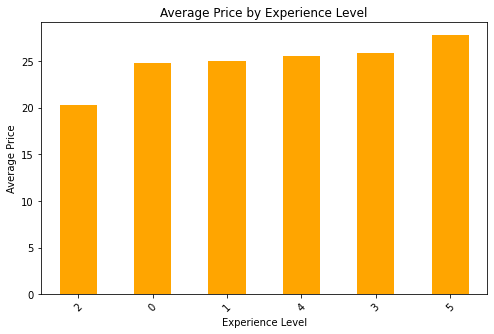

In [34]:
plt.figure(figsize=(8, 5))
avg_price_by_level = df.groupby("level")["price"].mean().sort_values()
avg_price_by_level.plot(kind="bar", color="orange")
plt.title("Average Price by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

# Level vs. Rating

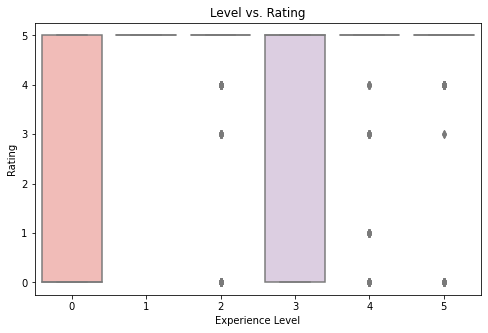

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["level"], y=df["rating"], palette="Pastel1")
plt.title("Level vs. Rating")
plt.xlabel("Experience Level")
plt.ylabel("Rating")
plt.show()

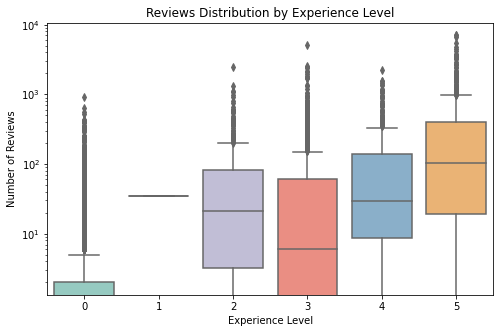

In [36]:
# 5. Boxplot of Reviews by Level
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["level"], y=df["reviews"], palette="Set3")
plt.title("Reviews Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Number of Reviews")
plt.yscale("log")  # Log scale to handle outliers
plt.show()


# Top 5 most common skills


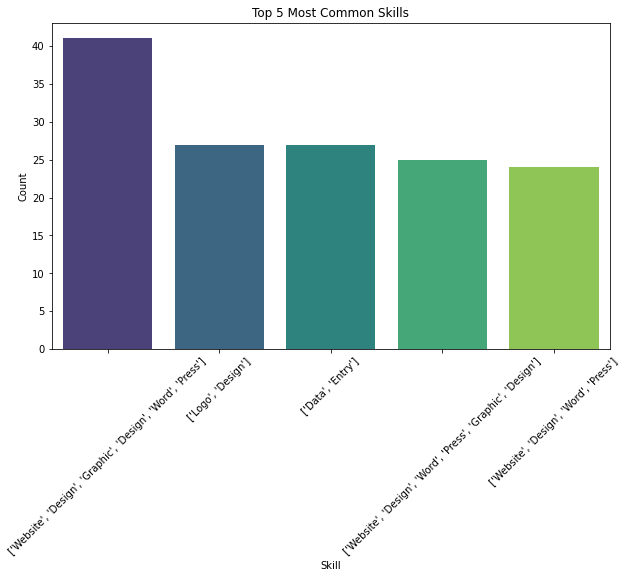

In [42]:
plt.figure(figsize=(10, 6))
common_skills = df_selected['skills_list_standardization'].explode().value_counts().head(5)
sns.barplot(x=common_skills.index, y=common_skills.values, palette='viridis')
plt.title('Top 5 Most Common Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Average rating by category


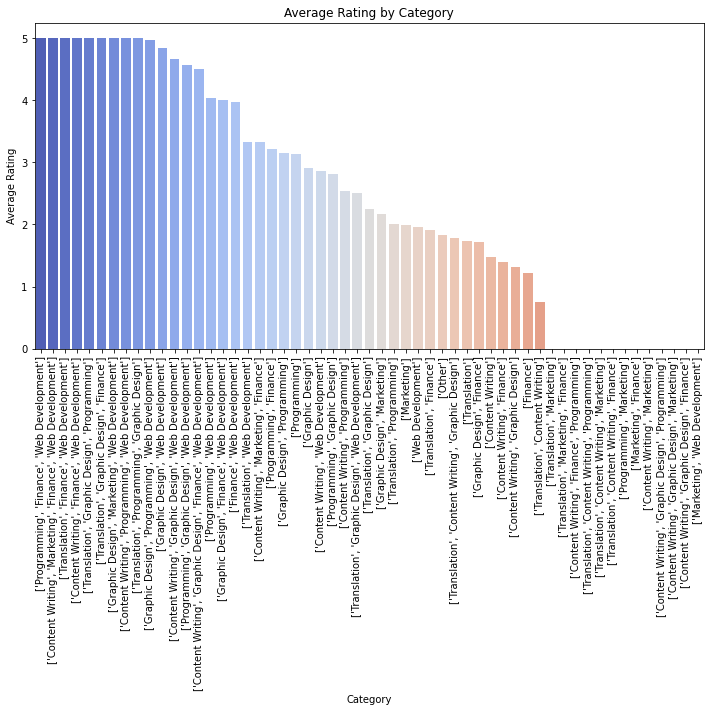

In [43]:
plt.figure(figsize=(12, 6))
avg_rating_by_category = df_selected.groupby('categories')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='coolwarm')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

# Average rating by category top10


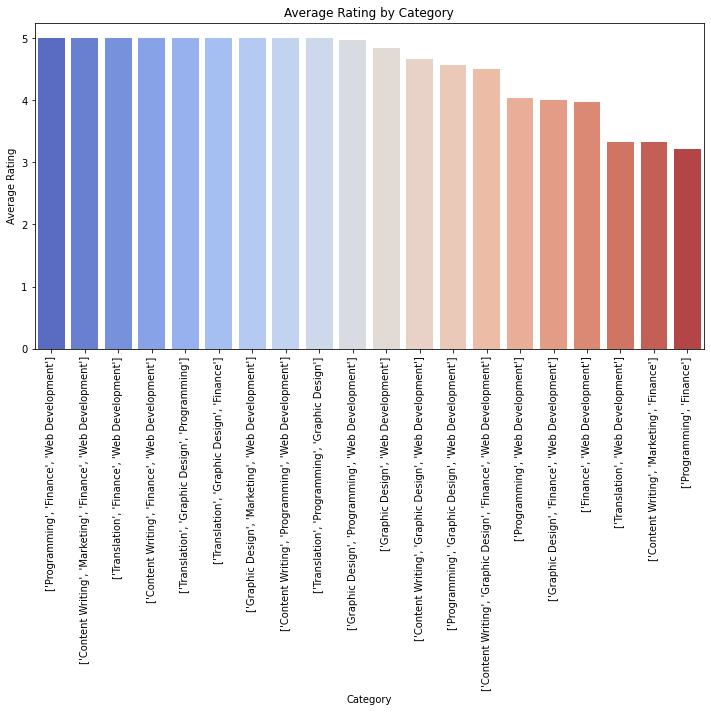

In [57]:
plt.figure(figsize=(12, 6))
avg_rating_by_category = df_selected.groupby('categories')['rating'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='coolwarm')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

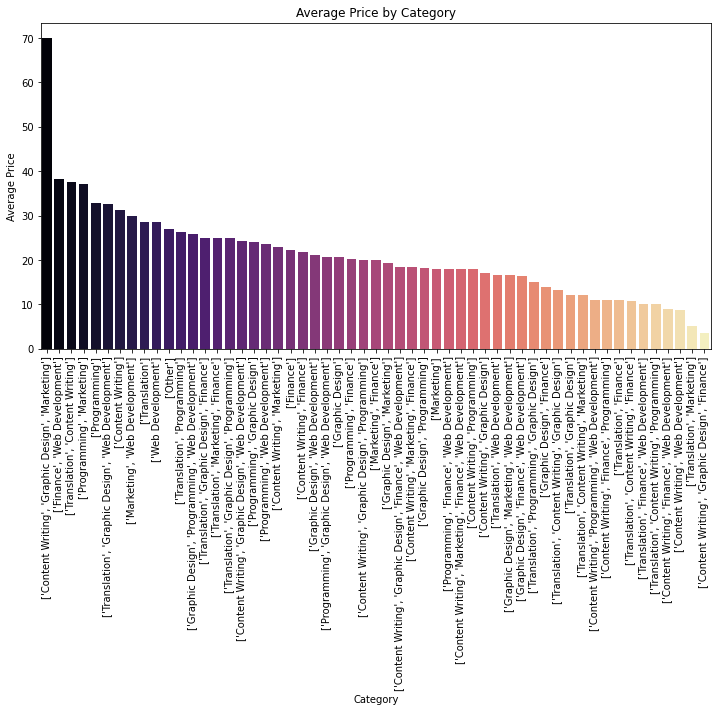

In [44]:
# Average price by category
plt.figure(figsize=(12, 6))
avg_price_by_category = df_selected.groupby('categories')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette='magma')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


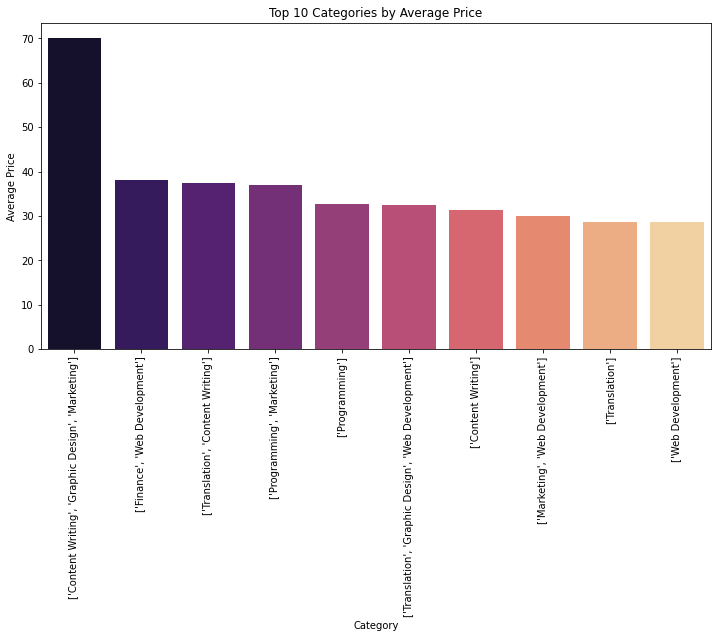

In [54]:
# Average price by top 10 categories
plt.figure(figsize=(12, 6))
avg_price_by_category = df_selected.groupby('categories')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette='magma')
plt.title('Top 10 Categories by Average Price')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Most popular categories


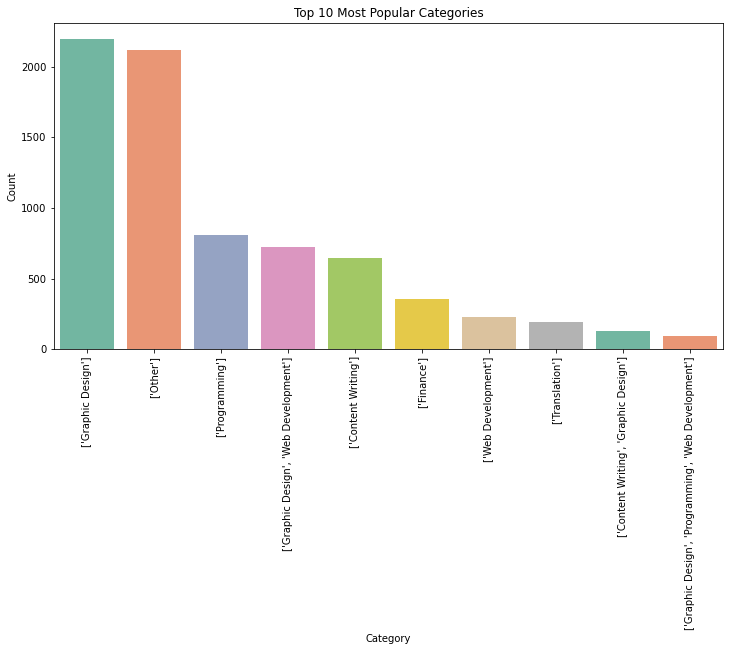

In [53]:
# Most popular categories
plt.figure(figsize=(12, 6))
popular_categories = df_selected['categories'].value_counts().head(10)
sns.barplot(x=popular_categories.index, y=popular_categories.values, palette='Set2')
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

